In [4]:
import pandas as pd

df = pd.read_csv("data/FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv")

print("Shape of data:", df.shape)
df.head()


Shape of data: (18510, 12)


,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023


In [5]:
df.describe(include='all')

# Checks how many unique hospitals and states are there along with the unique diseases.
print("Unique hospitals:", df['Facility Name'].nunique())
print("States covered:", df['State'].nunique())
print("Measures:", df['Measure Name'].unique())


Unique hospitals: 3021
States covered: 51
Measures: ['READM-30-AMI-HRRP' 'READM-30-CABG-HRRP' 'READM-30-HF-HRRP'
 'READM-30-HIP-KNEE-HRRP' 'READM-30-PN-HRRP' 'READM-30-COPD-HRRP']


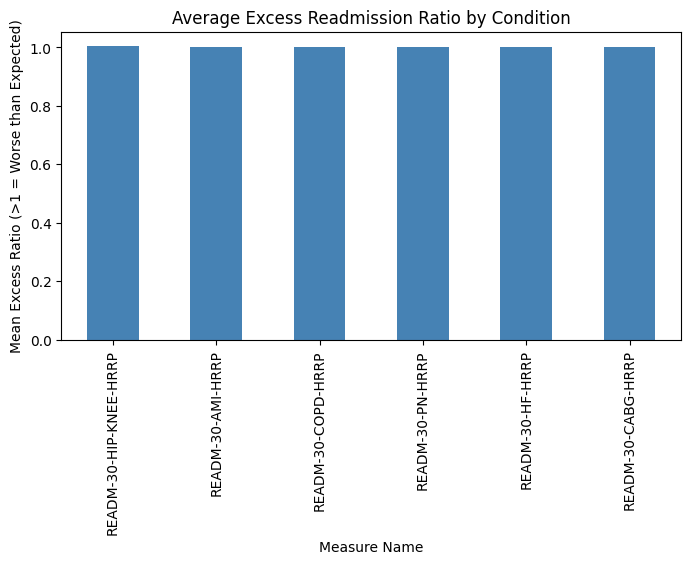

In [6]:
import matplotlib.pyplot as plt

# Average Excess Readmission Ratio by measure (disease)
avg_ratio_by_measure = (
    df.groupby("Measure Name")["Excess Readmission Ratio"]
    .mean()
    .sort_values(ascending=False)
)

avg_ratio_by_measure.plot(kind='bar', figsize=(8,4), color='steelblue')
plt.title("Average Excess Readmission Ratio by Condition")
plt.ylabel("Mean Excess Ratio (>1 = Worse than Expected)")
plt.show()


In [7]:
# Average Excess Readmission Ratio by State
avg_ratio_by_state = (
    df.groupby("State")["Excess Readmission Ratio"]
    .mean()
    .sort_values(ascending=False)
)

avg_ratio_by_state.head(10)  # worst performers


State
MA    1.040929
NJ    1.027824
IL    1.020149
DC    1.019689
FL    1.019341
NV    1.018937
WV    1.015663
VT    1.011689
KY    1.010749
CA    1.010414
Name: Excess Readmission Ratio, dtype: float64

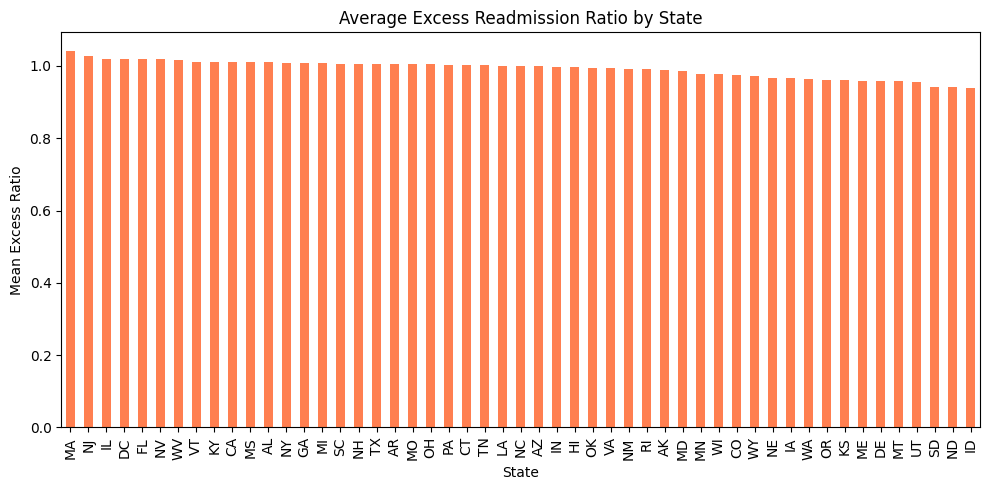

In [8]:
plt.figure(figsize=(10,5))
avg_ratio_by_state.plot(kind='bar', color='coral')
plt.title("Average Excess Readmission Ratio by State")
plt.ylabel("Mean Excess Ratio")
plt.xlabel("State")
plt.tight_layout()
plt.show()


In [9]:
import plotly.express as px

fig = px.choropleth(
    avg_ratio_by_state.reset_index(),
    locations='State',
    locationmode='USA-states',
    color='Excess Readmission Ratio',
    color_continuous_scale='Reds',
    range_color=(0.95, 1.05),
    scope="usa",
    title="Average Hospital Excess Readmission Ratio by State"
)
fig.show()


In [10]:
# Average ratio by state and condition
state_condition = (
    df.groupby(["State", "Measure Name"])["Excess Readmission Ratio"]
    .mean()
    .reset_index()
)

# Focus only on the top 5 worst states you found
worst_states = ["MA", "NJ", "IL", "DC", "FL"]
subset = state_condition[state_condition["State"].isin(worst_states)]

fig = px.bar(
    subset,
    x="State",
    y="Excess Readmission Ratio",
    color="Measure Name",
    barmode="group",
    title="Top 5 States: Excess Readmission Ratio by Condition"
)
fig.show()
